# Made by XDBoobs team ;)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset:

In [2]:
data = pd.read_csv("int20h-ds-test-dataset.csv")

### Inspecting the data:

In [3]:
data.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              23357 non-null  object
 1   user_state          23286 non-null  object
 2   event_name          23357 non-null  object
 3   event_attributes    23357 non-null  object
 4   event_created_date  23357 non-null  object
 5   event_platform      23357 non-null  object
 6   device_manufacture  15847 non-null  object
 7   device_model        15847 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


### Oops... Some columns have missing values

In [5]:
columns_with_missing_data = data.columns[data.isnull().any()]

print("Columns with missing data: ")
for i, col in enumerate(columns_with_missing_data):
    print(i+1, col)

Columns with missing data: 
1 user_state
2 device_manufacture
3 device_model


#### Percentage of missing data

In [6]:
print("Percentage of missing data: ")
data.isnull().sum() / data.shape[0] * 100

Percentage of missing data: 


userid                 0.000000
user_state             0.303977
event_name             0.000000
event_attributes       0.000000
event_created_date     0.000000
event_platform         0.000000
device_manufacture    32.153102
device_model          32.153102
dtype: float64

In [7]:
data[data['device_manufacture'].isnull()].head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
23,c664cc762bdcb88230b4b4f07e3b7d2e,CA,Transaction Refund,"{""Id"":""708ee8f2012042b121be7dcdd6df256a"",""Amou...",2022-01-16 21:41:05,outofband,NaN,NaN
34,017f4557810b3ba165d2959c17b916b6,TX,Subscription Premium,"{""Start Date"":""2022-01-16"",""Renewal Date"":""202...",2022-01-17 00:04:58,outofband,NaN,NaN
72,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 09:23:48,outofband,NaN,NaN
73,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 09:23:48,outofband,NaN,NaN
74,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 10:16:12,outofband,NaN,NaN


#### Every single row that misses *device_manufacture* also doen't have *device_model* and vice versa:

In [8]:
print(data[(data['device_manufacture'].isna()) & (data['device_model'].isna() == False)].empty)
print(data[(data['device_model'].isna()) & (data['device_manufacture'].isna() == False)].empty)

True
True


We can fill missing values in **device_manufacture** and **device_model** using information from same **userid**s

In [9]:
def fill_on_other_ids(data):
    null_data = data[data['device_manufacture'].isna()].copy()
    
    null_data['device_manufacture'] = null_data.apply(
        lambda row: (data[(data['userid'] == row['userid']) &
                        (data['device_manufacture'].isnull() == False)]['device_manufacture'].mode())[0]
                if (data[(data['userid'] == row['userid']) &
                        (data['device_manufacture'].isnull() == False)].empty == False)
                else row['device_manufacture'], axis=1)

    null_data['device_model'] = null_data.apply(
        lambda row: (data[(data['userid'] == row['userid']) &
                        (data['device_model'].isnull() == False)]['device_model'].mode())[0]
                if (data[(data['userid'] == row['userid']) &
                        (data['device_model'].isnull() == False)].empty == False)
                else row['device_model'], axis=1)

    data.update(null_data)
    
    return data

In [10]:
data = fill_on_other_ids(data)

In [11]:
print("Percentage of missing data: ")
data.isnull().sum() / data.shape[0] * 100

Percentage of missing data: 


userid                0.000000
user_state            0.303977
event_name            0.000000
event_attributes      0.000000
event_created_date    0.000000
event_platform        0.000000
device_manufacture    0.535171
device_model          0.535171
dtype: float64

Unfortunaly, some data is still missing :( 

However, as far as we know only Apple manufactures ios devices

In [12]:
print(data[(data['event_platform'] == 'ios') & ((data['device_manufacture'] == 'Apple') == False)].empty)

True


In [13]:
data['device_manufacture'].unique()

array(['samsung', 'Apple', 'TCL', nan, 'motorola', 'Yulong', 'Wingtech',
       'OnePlus', 'LGE', 'Google', 'realme', 'FIH', 'HMD Global',
       'Xiaomi', 'BLU', 'vsmart', 'HUAWEI', 'OPPO', 'KYOCERA', 'Umx',
       'HTC', 'Alcatel', 'ZTE'], dtype=object)

In [14]:
data.groupby(['device_manufacture']).size().sort_values(ascending = False) / data.groupby(['device_manufacture']).size().sum()

device_manufacture
Apple         0.609031
samsung       0.270876
Google        0.038783
motorola      0.024277
LGE           0.022383
OnePlus       0.009814
HMD Global    0.008351
TCL           0.007317
Wingtech      0.004821
BLU           0.000990
FIH           0.000861
vsmart        0.000560
HUAWEI        0.000517
Xiaomi        0.000344
Umx           0.000301
Yulong        0.000258
realme        0.000258
ZTE           0.000086
OPPO          0.000043
KYOCERA       0.000043
HTC           0.000043
Alcatel       0.000043
dtype: float64

We may actually consider that all other devices that have **event_platform** = 'android' have **device_manufacture** = 'samsung'

In [15]:
def fill_device_manufacture(data):
    null_data = data[data['device_manufacture'].isna()].copy()
    
    null_data['device_manufacture'] = null_data.apply(lambda row: 'Apple'
            if (row['event_platform'] == 'ios')
            else 'samsung', axis=1)

    data.update(null_data)
    
    return data

In [16]:
data = fill_device_manufacture(data)

We will fill the rest of **device_model** missing values on with the most popular model of their manufacture

In [17]:
def fill_device_model(data):
    null_data = data[data['device_model'].isna()].copy()
    
    null_data['device_model'] = null_data.apply(
        lambda row: data[data['device_manufacture'] == row['device_manufacture']]['device_model'].mode()[0], axis=1)

    data.update(null_data)
    
    return data

In [18]:
data = fill_device_model(data)

Now we will deal with the **user_state** column

In [19]:
data[data['user_state'].isnull()].head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
20,c5cf3fc44b606d4614a834a5306e9616,NaN,Sign Up Success,"{""Method"":""Email""}",2022-01-16 21:01:55,android,TCL,9032Z
93,ed09ebeba14600a9ff4defc64e32503c,NaN,Sign Up Success,"{""Method"":""Email""}",2022-01-17 04:40:32,ios,Apple,"iPhone11,6"
121,9182e94800ca0f8e9094ea3b8f5b169c,NaN,Sign Up Success,"{""Method"":""Google""}",2022-01-15 14:46:05,android,samsung,SM-A426U
148,838db409e7565bfa896beff8bf7fe023,NaN,Sign Up Success,"{""Method"":""Email""}",2022-01-17 15:43:30,android,motorola,moto g stylus 5G
150,838db409e7565bfa896beff8bf7fe023,NaN,Email Confirmation Success,{},2022-01-17 15:45:11,android,motorola,moto g stylus 5G


### There is no other *user_state* information for *userid*s that have missing values:

In [20]:
for row in data[data['user_state'].isnull()]['userid']:
    state_data = data[(data['userid'] == row) &
                      (data['user_state'].isnull() == False)]
    if state_data.empty == False:
        print(state_data)

Let's try to find some correlation between **user_state** and **event_platform**. (**device_manufacture** and **device_model** are not appropriate for this because they have got too much missing data themselves)

<AxesSubplot: xlabel='event_platform', ylabel='user_state'>

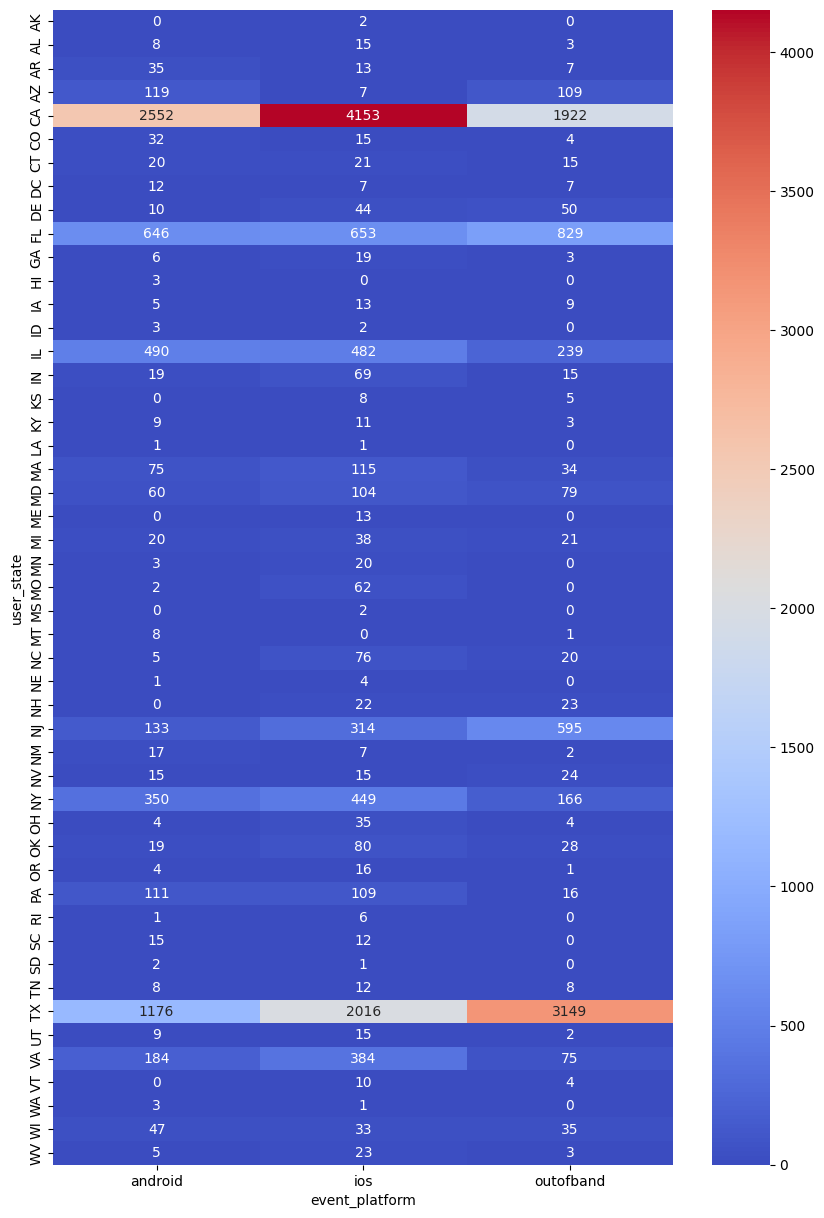

In [21]:
event_state_group = data[(data['user_state'].isnull() == False)].groupby(
    by=['user_state', 'event_platform']).size().unstack().fillna(0)
plt.figure(figsize=(10,15))
sns.heatmap(event_state_group, annot=True, fmt='g', cmap='coolwarm')

In [22]:
def fill_user_state(data):
    null_data = data[data['user_state'].isna()].copy()
    
    null_data['user_state'] = null_data.apply(lambda row: 'TX'
            if (row['event_platform'] == 'outofband')
            else 'CA', axis=1)
        
    data.update(null_data)
    
    return data

In [23]:
data = fill_user_state(data)

Now we need to classify the 'outofband' **event_platform** data

1. Firstly, as we did before with **device_manufacture** and **device_model**, we will fill missing values using information from same **userid**s
2. Anything that's left we will fill with the mode

In [24]:
def fill_outofband(data):
    outofband_data = data[data['event_platform'] == 'outofband'].copy()
    
    outofband_data['event_platform'] = outofband_data.apply(
        lambda row: (data[(data['userid'] == row['userid']) &
                        (data['event_platform'] != 'outofband')]['event_platform'].mode())[0]
                if (data[(data['userid'] == row['userid']) &
                        (data['event_platform'] != 'outofband')].empty == False)
                else data['event_platform'].mode()[0], axis=1)
    
    data.update(outofband_data)
    return data

In [25]:
data = fill_outofband(data)

In [26]:
# percentage of missing data
data.isnull().sum() / data.shape[0]*100

userid                0.0
user_state            0.0
event_name            0.0
event_attributes      0.0
event_created_date    0.0
event_platform        0.0
device_manufacture    0.0
device_model          0.0
dtype: float64

Let's convert **event_created_date** from string to unix time format

In [27]:
data['event_created_date'] = data['event_created_date'].apply(lambda x: pd.to_datetime(x).value)

Now we will need to deal with **event_name** and **event_attributes**

In [28]:
event_names = data['event_name'].unique()
print(event_names)

['Add Vehicle Success' 'Add Vehicle Break' 'Calculator View'
 'Add Payment Method Success' 'Sign Up Success'
 'Add Payment Method Failed' 'Wallet Opened' 'Transaction Refund'
 'Email Confirmation Success' 'Account Setup Skip' 'Subscription Premium'
 'Chat Conversation Opened' 'Account Setup Profile Skip'
 'Account History Transaction Details' 'Sign Out'
 'Chat Conversation Started' 'Order' 'Sign Up Error'
 'Subscription Premium Cancel' 'Calculator Used'
 'Subscription Premium Renew' 'Add Vehicle Failed' 'Reset Password Set']


In [29]:
for name in event_names:
    print(name, '\n', data[data['event_name'] == name]['event_attributes'].unique(), '\n')

Add Vehicle Success 
 ['{"Make":"Dodge","Model":"Caravan","Color":"White","Year":"2019","Temporary":"false","Start Date":"","End Date":"","Rental state":""}'
 '{"Make":"Ford","Model":"F-150","Temporary":"false","Color":"Black","Year":"2017"}'
 '{"Start Date":"16/01/2022","Make":"Chevrolet","Model":"Malibu","Temporary":"true","Rental State":"CA","End Date":"18/01/2022","Color":"White","Year":"2020"}'
 ...
 '{"Make":"Ford","Model":"F-350","Color":"White","Year":"2012","Temporary":"false","Start Date":"","End Date":"","Rental State":""}'
 '{"Make":"Chevrolet","Model":"Impala","Color":"Silver","Year":"2019","Temporary":"true","Start Date":"Apr 16, 2022","End Date":"Apr 27, 2022","Rental State":"CA"}'
 '{"Year":"2015","Model":"Hino","Temporary":"false","Color":"Black","Make":"Hino"}'] 

Add Vehicle Break 
 ['{}'] 

Calculator View 
 ['{}'] 

Add Payment Method Success 
 ['{"Payment Method":"Credit","Tokenized Pay":""}'
 '{"Payment Method":"Credit"}'
 '{"Tokenized Pay":"Apple Pay","Payment M

1. **'Reset Password Set', 'Subscription Premium Cancel', 'Chat Conversation Started', 'Account Setup Skip', 'Wallet Opened', 'Calculator View', 'Add Vehicle Break'** columns have no attributes at all.

In [30]:
no_attribute_features = ['Reset Password Set',
                             'Subscription Premium Cancel',
                             'Chat Conversation Started',
                             'Account Setup Skip',
                             'Wallet Opened',
                             'Calculator View',
                             'Add Vehicle Break']

In [31]:
def extract_no_attribute_features(data):
    for feature in no_attribute_features:
        data.loc[data.event_name == feature, 'event_attributes'] = 1

        df = pd.DataFrame()

        df['userid'] = data[data['event_name'] == feature]['userid']

        df = data[data['event_name'] == feature].groupby('userid').agg({'event_attributes':'sum'}).reset_index()

        df.rename(columns = {'event_attributes':f'{feature.replace(" ", "_").lower()}_count'}, inplace = True)

        data[f'{feature.replace(" ", "_").lower()}_count'] = 0

        data.update(df)
    
    return data

2. We can see that actually error is the same for all 'Add Vehicle Failed':

In [32]:
data[data['event_name'] == 'Add Vehicle Failed']['event_attributes']

4849     {"Error Code":"ERROR-NaN10","Error Message":"T...
4850     {"Error Message":"The operation couldn’t be co...
4938     {"Error Code":"ERROR-NaN10","Error Message":"T...
4939     {"Error Code":"ERROR-NaN10","Error Message":"T...
4940     {"Error Message":"The operation couldn’t be co...
4941     {"Error Code":"ERROR-NaN10","Error Message":"T...
4942     {"Error Code":"ERROR-NaN10","Error Message":"T...
5755     {"Error Code":"ERROR-NaN10","Error Message":"T...
10599    {"Error Code":"ERROR-NaN10","Error Message":"T...
10600    {"Error Message":"Start Date (in User Timezone...
12929    {"Error Code":"ERROR-NaN10","Error Message":"T...
12930    {"Error Message":"The operation couldn’t be co...
12931    {"Error Code":"ERROR-NaN10","Error Message":"T...
12932    {"Error Code":"ERROR-NaN10","Error Message":"T...
12933    {"Error Code":"ERROR-NaN10","Error Message":"T...
12934    {"Error Message":"The operation couldn’t be co...
12936    {"Error Message":"The operation couldn’t be co.

In [33]:
def extract_add_vehicle_failed(data):
    
    data.loc[data.event_name == 'Add Vehicle Failed', 'event_attributes'] = 1

    errors_df = pd.DataFrame()

    errors_df['userid'] = data[data['event_name'] == 'Add Vehicle Failed']['userid']

    errors_df = data[data['event_name'] == 'Add Vehicle Failed'].groupby('userid').agg({'event_attributes':'sum'}).reset_index()

    errors_df.rename(columns = {'event_attributes':'add_vehicle_errors_ERROR-NaN10_count'}, inplace = True)

    data['add_vehicle_errors_ERROR-NaN10_count'] = 0

    data.update(errors_df)
    
    return data

3. There is information about subscribtion rernew duration and type in 'Subscription Premium Renew' column

In [34]:
data[data['event_name'] == 'Subscription Premium Renew']['event_attributes']

2145     {"Start Date":"2022-02-02","Renewal Date":"202...
2146     {"Start Date":"2022-02-02","Renewal Date":"202...
2225     {"Start Date":"2022-02-03","Renewal Date":"202...
2226     {"Start Date":"2022-02-03","Renewal Date":"202...
2342     {"Start Date":"2022-02-04","Renewal Date":"202...
                               ...                        
22767    {"Start Date":"2022-04-16","Renewal Date":"202...
22771    {"Start Date":"2022-04-16","Renewal Date":"202...
22772    {"Start Date":"2022-04-16","Renewal Date":"202...
23105    {"Start Date":"2022-04-17","Renewal Date":"202...
23107    {"Start Date":"2022-04-17","Renewal Date":"202...
Name: event_attributes, Length: 310, dtype: object

All the 'event_attributes' data has the same format, so we will define parse function:

In [35]:
def parse_event_attributes(data):
    data = data.apply(lambda row: "".join(
        filter(lambda char: (char != "{") & (char != "}") & (char != ",") & (char != ":"), row)))
    
    data = data.apply(lambda row: row.split('"'))
    data = data.apply(lambda row: row[1::2])
    
    return data

In [36]:
def extract_subscription_premium_renew(data):
    renew = data[data['event_name'] == 'Subscription Premium Renew']['event_attributes']
    
    renew = parse_event_attributes(renew)
    renew = renew.apply(lambda row: row[1::2])
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Subscription Premium Renew']['userid']
    
    df['renew_type'] = renew.apply(
        lambda row: row[-1])
    
    df['renew_duration'] = renew.apply(
        lambda row: pd.to_datetime(row[1]).value - pd.to_datetime(row[0]).value)
    
    df = df.groupby('userid').agg(
        {'renew_type':'first','renew_duration':'sum'}).reset_index()
    
    data['renew_duration'] = 0
    data['renew_type'] = 'None'
    
    data.update(df)
    
    return data

4. Extract information about 'Subscription Premium' the same way

In [37]:
data[data['event_name'] == 'Subscription Premium']['event_attributes']

34       {"Start Date":"2022-01-16","Renewal Date":"202...
85       {"Start Date":"2022-01-16","Renewal Date":"202...
119      {"Start Date":"2022-01-15","Renewal Date":"202...
138      {"Start Date":"2022-01-15","Renewal Date":"202...
153      {"Start Date":"2022-01-17","Renewal Date":"202...
                               ...                        
23272    {"Start Date":"2022-04-16","Renewal Date":"202...
23281    {"Start Date":"2022-04-16","Renewal Date":"202...
23286    {"Start Date":"2022-04-16","Renewal Date":"202...
23298    {"Start Date":"2022-04-16","Renewal Date":"202...
23356    {"Start Date":"2022-04-16","Renewal Date":"202...
Name: event_attributes, Length: 711, dtype: object

In [38]:
def extract_subscription_premium(data):
    sub = data[data['event_name'] == 'Subscription Premium']['event_attributes']
    
    sub = parse_event_attributes(sub)
    sub = sub.apply(lambda row: row[1::2])
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Subscription Premium']['userid']
    
    df['subscription_type'] = sub.apply(
        lambda row: row[-1])
    
    df['subscription_duration'] = sub.apply(
        lambda row: pd.to_datetime(row[1]).value - pd.to_datetime(row[0]).value)
    
    df = df.groupby('userid').agg(
        {'subscription_type':'first','subscription_duration':'sum'}).reset_index()
    
    data['subscription_duration'] = 0
    data['subscription_type'] = 'None'
    
    data.update(df)
    
    return data

5. 'Sign Out' can be only 'Manual' or 'Auto'

In [39]:
data[data['event_name'] == 'Sign Out']['event_attributes']

58       {"Type":"Manual"}
250      {"Type":"Manual"}
268        {"Type":"Auto"}
327      {"Type":"Manual"}
346      {"Type":"Manual"}
               ...        
23131      {"Type":"Auto"}
23145    {"Type":"Manual"}
23152      {"Type":"Auto"}
23195      {"Type":"Auto"}
23256    {"Type":"Manual"}
Name: event_attributes, Length: 595, dtype: object

In [40]:
def extract_sign_out(data):
    sign_out = data[data['event_name'] == 'Sign Out']['event_attributes']
    
    sign_out = parse_event_attributes(sign_out)
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Sign Out']['userid']
    
    df['sign_out_type'] = sign_out.apply(lambda row: row[-1])
    
    data['sign_out_type'] = 'None'
    
    data.update(df)
    
    return data

6. 'Order' can have only "Premium Membership":"True" or "Premium Membership":"False" values

In [41]:
data[data['event_name'] == 'Order']['event_attributes']

72       {"Premium Membership":"True"}
73       {"Premium Membership":"True"}
74       {"Premium Membership":"True"}
75       {"Premium Membership":"True"}
94       {"Premium Membership":"True"}
                     ...              
23335    {"Premium Membership":"True"}
23336    {"Premium Membership":"True"}
23337    {"Premium Membership":"True"}
23338    {"Premium Membership":"True"}
23339    {"Premium Membership":"True"}
Name: event_attributes, Length: 6116, dtype: object

In [42]:
def extract_order(data):
    order = data[data['event_name'] == 'Order']['event_attributes']
    
    order = parse_event_attributes(order)
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Order']['userid']
    
    df['order_type'] = order.apply(lambda row: row[-1])
    
    data['order_type'] = 'None'
    
    data.update(df)
    
    return data

7. 'Sign Up Success' categories are the values of 'Method' attribute

In [43]:
data[data['event_name'] == 'Sign Up Success']['event_attributes']

4         {"Method":"Apple"}
5        {"Method":"Google"}
6        {"Method":"Google"}
7        {"Method":"Google"}
9         {"Method":"Apple"}
                ...         
23279     {"Method":"Email"}
23295    {"Method":"Google"}
23301    {"Method":"Google"}
23349     {"Method":"Apple"}
23350     {"Method":"Apple"}
Name: event_attributes, Length: 3329, dtype: object

In [44]:
def extract_order(data):
    sign_up = data[data['event_name'] == 'Sign Up Success']['event_attributes']
    
    sign_up = parse_event_attributes(sign_up)
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Sign Up Success']['userid']
    
    df['sign_up_type'] = sign_up.apply(lambda row: row[-1])
    
    data['sign_up_type'] = 'None'
    
    data.update(df)
    
    return data

8. Sum all the refunds for a specific id, otherwise 'refund_amount' is 0

In [45]:
data[data['event_name'] == 'Transaction Refund']['event_attributes']

23       {"Id":"708ee8f2012042b121be7dcdd6df256a","Amou...
476      {"Id":"2d795a386ea1e02252e543886b812a9b","Amou...
479      {"Id":"3064c45c1a47fcc774ff2d3071dd9f08","Amou...
517      {"Id":"8b58302d81c15a27545e492bdbeee2ef","Amou...
2526     {"Id":"570f2db617899393f6fe057112a4b894","Amou...
                               ...                        
22072    {"Id":"ebc7b7a62ab968796c5cf758a0e83182","Amou...
22073    {"Id":"4f3c6f5ea897b5006f9e80984e10454e","Amou...
22343    {"Id":"8fb90395f21af9e4760f84d555b83968","Amou...
22371    {"Id":"3c8b2b7ed2b8063f51eb31d70ed00e26","Amou...
23012    {"Id":"2e47bf350f766c32d3ff2bed4e90e7bb","Amou...
Name: event_attributes, Length: 102, dtype: object

In [46]:
def extract_transaction_refund(data):
    refund = data[data['event_name'] == 'Transaction Refund']['event_attributes']
    
    refund = parse_event_attributes(refund)
    refund = refund.apply(lambda row: row[1::2])
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Transaction Refund']['userid']
    
    df['refund_amount'] = refund.apply(lambda row: float(row[-1]))
    
    df = df.groupby('userid').agg({'refund_amount':'sum'}).reset_index()
    
    data['refund_amount'] = 0.0
    
    data.update(df)
    
    return data

9. 'Add Payment Method Success' is iether "Required":"true" or not

In [47]:
data[data['event_name'] == 'Email Confirmation Success']['event_attributes']

25       {"Required":"true"}
29       {"Required":"true"}
33       {"Required":"true"}
36       {"Required":"true"}
53       {"Required":"true"}
                ...         
23142    {"Required":"true"}
23194                     {}
23199    {"Required":"true"}
23247                     {}
23258                     {}
Name: event_attributes, Length: 853, dtype: object

In [48]:
def extract_email_confirmation(data):
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Email Confirmation Success']['userid']
    
    df['email_confirmation_required'] = 1
    
    data['email_confirmation_required'] = 0
    
    data.update(df)
    
    return data

10. 'Account Setup Profile Skip' attribute 'Screen' has different values

In [49]:
data[data['event_name'] == 'Account Setup Profile Skip']['event_attributes']

50               {"Screen":"Address"}
51          {"Screen":"Phone Number"}
136              {"Screen":"Address"}
137         {"Screen":"Phone Number"}
164      {"Screen":"Address Details"}
                     ...             
23085            {"Screen":"Address"}
23092            {"Screen":"Address"}
23093       {"Screen":"Phone number"}
23353            {"Screen":"Address"}
23354       {"Screen":"Phone Number"}
Name: event_attributes, Length: 498, dtype: object

In [50]:
def extract_setup_skip(data):
    skip = data[data['event_name'] == 'Account Setup Profile Skip']['event_attributes']
    
    skip = parse_event_attributes(skip)
    skip = skip.apply(lambda row: row[1::2])
    
    df = pd.DataFrame()
    
    df['userid'] = data[data['event_name'] == 'Account Setup Profile Skip']['userid']
    
    df['skip_type'] = skip.apply(lambda row: row[-1])
    
    data['skip_type'] = 'None'
    
    data.update(df)
    
    return data

11. 'Sign Up Error' actual error doesn't really matter: it 'Sign Up Error' will affect the target we will expect this feature more close

In [51]:
def extract_sign_up_error(data):
    data.loc[data.event_name == 'Sign Up Error', 'event_attributes'] = 1

    errors_df = pd.DataFrame()

    errors_df['userid'] = data[data['event_name'] == 'Sign Up Error']['userid']

    errors_df = data[data['event_name'] == 'Sign Up Error'].groupby('userid').agg({'event_attributes':'sum'}).reset_index()

    errors_df.rename(columns = {'event_attributes':'sign_up_errors_count'}, inplace = True)

    data['sign_up_errors_count'] = 0

    data.update(errors_df)
    
    return data

In [52]:
def extract_features(data):
    data = extract_no_attribute_features(data)
    
    data = extract_add_vehicle_failed(data)
    
    data = extract_subscription_premium_renew(data)
    
    data = extract_subscription_premium(data)
    
    data = extract_sign_out(data)
    
    data = extract_order(data)
    
    data = extract_order(data)
    
    data = extract_transaction_refund(data)
    
    data = extract_email_confirmation(data)
    
    data = extract_setup_skip(data)
    
    data = extract_sign_up_error(data)
    
    return data

In [53]:
data = extract_features(data)

In [57]:
data

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,reset_password_set_count,subscription_premium_cancel_count,...,renew_duration,renew_type,subscription_duration,subscription_type,sign_out_type,sign_up_type,refund_amount,email_confirmation_required,skip_type,sign_up_errors_count
0,055e053eb2ae911a0c115477fa53f753,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",1642352584000000000,android,samsung,SM-N975U,1,1,...,3.153600e+16,Yearly,2.505600e+15,Monthly,None,None,-20.00,0.0,None,1
1,128a762fee5fa3159c49dbb4ed43ceca,CA,Add Vehicle Break,1,1642352867000000000,android,samsung,SM-N975U,0,1,...,5.097600e+15,Monthly,2.678400e+15,Monthly,None,None,-18.01,0.0,None,2
2,18b9953f2328fed7482dda3deb45dcf5,FL,Calculator View,1,1642353385000000000,android,samsung,SM-G973U1,0,1,...,3.153600e+16,Yearly,2.678400e+15,Monthly,None,None,-10.00,0.0,None,1
3,36739ce8f56bb54b2a83f3c3dc872224,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",1642353862000000000,android,samsung,SM-N975U,0,1,...,3.153600e+16,Yearly,2.764800e+15,Monthly,None,None,-29.99,0.0,None,1
4,4a9527050cada75c5494e4bf56195364,IL,Sign Up Success,"{""Method"":""Apple""}",1642354491000000000,ios,Apple,"iPhone12,1",0,2,...,5.270400e+15,Monthly,2.505600e+15,Monthly,None,Apple,-20.00,0.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",1650142164000000000,android,Google,Pixel 3a,0,0,...,0.000000e+00,None,0.000000e+00,None,None,None,0.00,0.0,None,0
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Address""}",1650142205000000000,android,Google,Pixel 3a,0,0,...,0.000000e+00,None,0.000000e+00,None,None,None,0.00,0.0,Address,0
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Phone Number""}",1650142210000000000,android,Google,Pixel 3a,0,0,...,0.000000e+00,None,0.000000e+00,None,None,None,0.00,0.0,Phone Number,0
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,"{""From"":""Dashboard"",""Transaction type"":""""}",1650142231000000000,android,Google,Pixel 3a,0,0,...,0.000000e+00,None,0.000000e+00,None,None,None,0.00,0.0,None,0


In [58]:
['Add Vehicle Success',
 'Add Payment Method Success',
 'Add Payment Method Failed',
 'Email Confirmation Success',
 'Chat Conversation Opened',
 'Account History Transaction Details',
 'Calculator Used',
 'Subscription Premium Renew']

['Add Vehicle Success',
 'Add Payment Method Success',
 'Add Payment Method Failed',
 'Email Confirmation Success',
 'Chat Conversation Opened',
 'Account History Transaction Details',
 'Calculator Used',
 'Subscription Premium Renew']